In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [4]:
#Parameters
qgoal = (0,0)
dstar = 1
zeta = 1
r1 = 1
q1 = (2,0)
q2 = (-2,0)
Qstar = 1
eta = 1

In [5]:
#Make a 1001 * 1001 matrix of streamplot
w = 5
xy_sample = 1001
Y, X = np.mgrid[-w:w:1001j, -w:w:1001j]
U = np.zeros((xy_sample, xy_sample)) 
V = np.zeros((xy_sample, xy_sample)) 

In [6]:
def getDistance(point,target):
  return math.sqrt((point[0]-target[0])**2 + (point[1]-target[1])**2)

In [7]:
#For point in Euclidean Coordinate, get the gradient in x and y direction
def getXYgradient(point):
  Uax = 0
  Uay = 0
  Urx = 0
  Ury = 0
  goal_dis = getDistance(point, qgoal);
  obs1_dis = getDistance(point, q1)
  obs2_dis = getDistance(point, q2)

  if obs1_dis <= r1 or obs2_dis <= r1:
    return 0,0

  #Get the gradient of Ua in x and y direction (Attrative Force)
  if goal_dis <= dstar:
    Uax = zeta * (point[0] - qgoal[0])
    Uay = zeta * (point[1] - qgoal[1])
  else:
    Uax = (dstar * zeta * (point[0] - qgoal[0]))/(goal_dis)
    Uay = (dstar * zeta * (point[1] - qgoal[1]))/(goal_dis)
  #Get the gradient of Ur in x and y direction (Repulsive Force)
  if obs1_dis <= (Qstar + r1):
    c1 = ((point[0]-2) * r1/obs1_dis + 2, point[1] * r1/obs1_dis) #c1 is the closet point on convex obstacle
    print(c1)
    Urx = (eta/((obs1_dis - r1)**2)) * (1/Qstar - 1/(obs1_dis - r1)) * (point[0] - c1[0])/(obs1_dis-r1)
    Ury = (eta/((obs1_dis - r1)**2)) * (1/Qstar - 1/(obs1_dis - r1)) * (point[1] - c1[1])/(obs1_dis-r1)
  if obs2_dis <= (Qstar + r1):
    c2 = ((point[0]+2) * r1/obs2_dis - 2 ,point[1] * r1/obs2_dis) #c2 is the closet point on convex obstacle
    Urx = (eta/((obs2_dis - r1)**2)) * (1/Qstar - 1/(obs2_dis - r1)) * (point[0] - c2[0])/(obs2_dis-r1)
    Ury = (eta/((obs2_dis - r1)**2)) * (1/Qstar - 1/(obs2_dis - r1)) * (point[1] - c2[1])/(obs2_dis-r1)
  return -(Uax + Urx), -(Uay + Ury)

In [8]:
getXYgradient((0.5,0.5))

(1.0513167019494862, 0.31622776601683794)


(-2.524657990715308, 0.17488599690510265)

In [7]:
#Get gradient of all points in X,Y grid
allpoints = []
for j in np.linspace(-5,5,xy_sample):
  for i in np.linspace(-5,5,xy_sample): 
    allpoints.append(getXYgradient((i,j)))

In [8]:
#Put gradient of point into U, V
for i in range(0,xy_sample):
  for j in range(0,xy_sample):
    U[i,j] = allpoints[i*xy_sample+j][0]
    V[i,j] = allpoints[i*xy_sample+j][1]


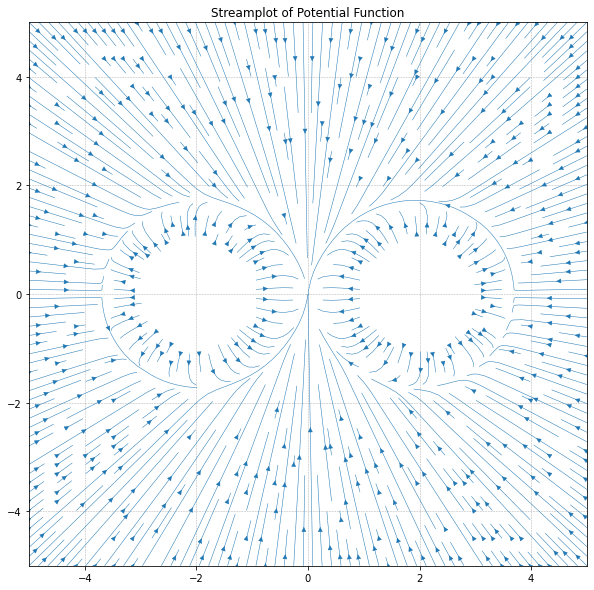

In [9]:
#Plot the streamline, set minlength to 0.01 to show the 
plt.figure(figsize = (10,10))
plt.streamplot(X, Y, U, V, linewidth=0.5, density = 2, minlength=0.01)
plt.title("Streamplot of Potential Function")
plt.grid(linestyle = '--', linewidth = 0.5)